In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'Hiragino Sans'

In [7]:
df = pd.read_csv('../data/apparel_clean.csv')
df["ds"] = pd.to_datetime(df["ds"])

In [8]:
df.head(3)

,ds,Weather,Bargain,y,Closed,Holiday
0,1990-01-05,0.0,0.0,58507.0,0,0
1,1990-01-06,0.0,0.0,49088.0,0,0
2,1990-01-07,0.0,0.0,50066.0,0,0


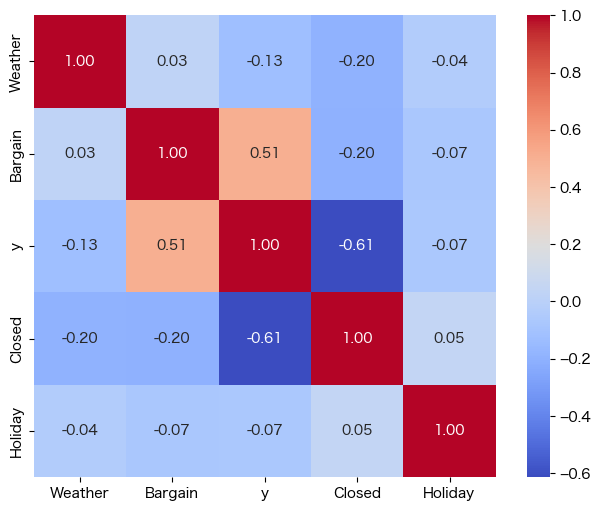

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

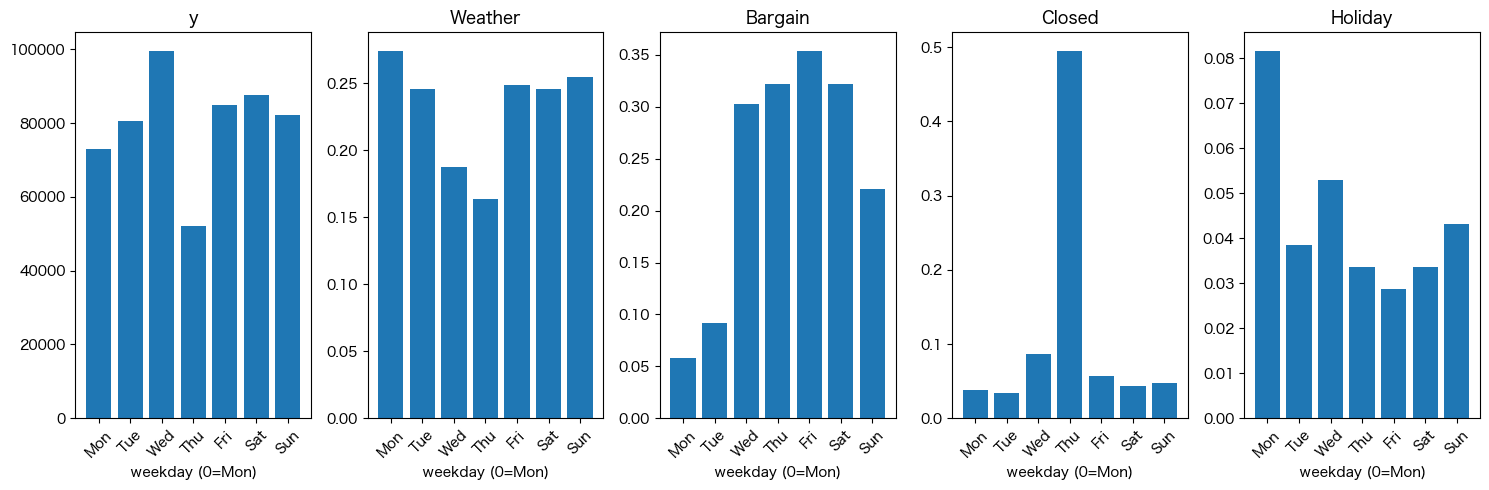

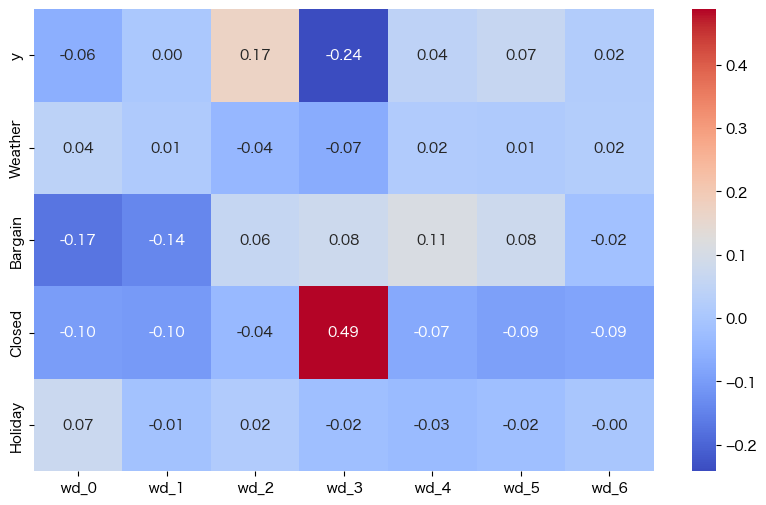

In [ ]:
# 曜日と各列の相関を可視化
df_new = df.copy()
df_new['weekday'] = df_new['ds'].dt.dayofweek

weekday_means = df_new.groupby('weekday')[['y', 'Weather', 'Bargain', 'Closed', 'Holiday']].mean()

plt.figure(figsize=(15,5))
for i, col in enumerate(['y', 'Weather', 'Bargain', 'Closed', 'Holiday']):
    plt.subplot(1,5,i+1)
    plt.bar(weekday_means.index, weekday_means[col])
    plt.title(col)
    plt.xlabel('weekday (0=Mon)')
    plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=45)
    plt.tight_layout()

plt.show()

weekday_dummies = pd.get_dummies(df_new['weekday'], prefix='wd')
corr = df_new[['y', 'Weather', 'Bargain', 'Closed', 'Holiday']].join(weekday_dummies).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr.loc[['y', 'Weather', 'Bargain', 'Closed', 'Holiday'], weekday_dummies.columns], annot=True, fmt='.2f', cmap='coolwarm')
plt.show()